In [54]:
import pandas as pd
import numpy as np
import math
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.pipeline
import sklearn.neighbors

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
df = pd.read_csv("SamsungStocks.csv", parse_dates = True, index_col = "date")
df.head(10)

,volume,Open_USD,High_USD,Low_USD,Close_USD,Adj_Close_USD
date,,,,,,
2015-09-04,9107550,26.948979,27.297299,26.948979,27.187303,0.263654
2015-10-04,9960100,27.020174,27.275770,26.983660,27.202743,0.263804
2015-04-13,10293300,26.831270,27.048968,26.631713,26.831270,0.260201
2015-04-14,9429750,27.119021,27.119021,26.753782,26.918139,0.261043
2015-04-15,13551050,26.641380,26.823855,26.039212,26.385915,0.255882
2015-04-16,10762350,26.893388,27.169312,26.617464,27.169312,0.263479
2015-04-17,10172300,27.370647,27.389178,26.814710,26.870304,0.260580
2015-04-20,12394900,26.727788,26.764756,26.302657,26.432045,0.256330
2015-04-21,11852650,26.241694,26.684904,26.223227,26.666437,0.258603


In [56]:
# We want to separate 1 % of the data for validation and to forecast
forecast_out = int(math.ceil(0.01 * len(df)))
# Separating the label here, want to predict the AdjClose label
forecast_col = 'Adj_Close_USD'
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'], 1))
X = sklearn.preprocessing.scale(X)
# Finally want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(df['label'])
y = y[:-forecast_out]
# split into test and train data), test_size = 0.2 ==> 20% data is test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  880 220


In [30]:
#Linear Regression

reg = sklearn.linear_model.LinearRegression(n_jobs = -1)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [22]:
#Quadratic Regression 2

poly2 = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(2), sklearn.linear_model.Ridge())
poly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [23]:
#Quadratic Regression 3

poly3 = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(3), sklearn.linear_model.Ridge())
poly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [26]:
#KNN Regression

knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [27]:
conf_reg = reg.score(X_test, y_test)
print('Linear regression confidence is:', conf_reg)
conf_poly2 = poly2.score(X_test,y_test)
print('Quadratic regression2 confidence is:', conf_poly2)
conf_poly3 = poly3.score(X_test,y_test)
print('Quadratic regression3 confidence is:', conf_poly3)
conf_knn = knn.score(X_test, y_test)
print('knn regression confidence is:', conf_knn)

Linear regression confidence is: 0.9870022296122294
Quadratic regression2 confidence is: 0.9858568808176921
Quadratic regression3 confidence is: 0.9837183228116625
knn regression confidence is: 0.9750016384147017


In [28]:
y_predicted = reg.predict(X_lately)
y_predicted # sanity test -> foretasted prices

array([41.63245455, 42.40840977, 42.53114723, 42.89915699, 43.11410315,
       42.3905912 , 43.21255958, 43.8563039 , 43.96183607, 43.09485958,
       43.57960599, 44.11803811])

In [53]:
r2_score = reg.score(X_test, y_test)*100
print("R2 for linear regression", float("{0:.2f}".format(r2_score)))

R2 for linear regression 98.7


In [38]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.05347419  0.15958058 -2.33462743  2.3330183   0.82704188 16.44423211]
Mean squared error: 3.92
Coefficient of determination: 0.99


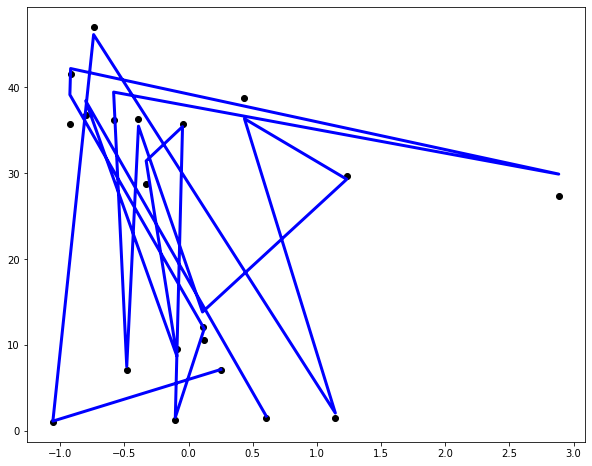

In [52]:
import matplotlib.pyplot as plt

# Plot outputs
plt.figure(figsize=(10,8))
plt.scatter(X_test[0:20,0], y_test[0:20],  color='black')
plt.plot(X_test[0:20,0], y_pred[0:20], color='blue', linewidth=3)


plt.show()

In [58]:
print(X_test)

[[ 0.60477964 -0.75770049 -0.78618318 -0.80937314 -0.83675585 -0.96911036]
 [-0.80195422  0.497089    0.45728646  0.4723627   0.47389087  1.17432677]
 [-0.0910703   0.10531186  0.15280749  0.13137729  0.17321505 -0.60625624]
 ...
 [-0.57849873  0.82893466  0.79969828  0.85758187  0.83015126 -0.32115272]
 [-0.52027446  1.14816187  1.11463581  1.16150368  1.12563421 -0.27346071]
 [-0.49032674  0.83007815  0.80183651  0.7897132   0.76488349  1.31296162]]


In [59]:
print(y_test)

[ 1.48311418 36.82545776  9.54420058 28.73550569 35.72868919  1.29187199
 10.55516572 35.77101897 41.53342927 27.35895269 36.15919978  7.09452487
 36.36754814 12.12568084 29.64297793 38.78188398  1.47747928 47.06523242
  1.06542762  7.14877795  0.23795167 13.23970534  1.35526233 42.93237029
  0.90385801 35.88204398 43.8488243   0.22719734 40.42185281 46.59006444
  0.89895061 40.75063212 36.82034956  1.46795218 41.00471393 39.3608493
 39.23632812 40.42161784 13.10215604  1.40176011  1.44812483 10.23632587
  0.2239641  15.43674616 37.4140329  10.1749966  41.93950283 28.87555007
 41.30112324  9.32315073 12.53426408 45.75890632 10.17879845  1.34235672
 40.12717347  0.22205358  1.36776472 40.11798797 42.30943523 28.90099654
 37.77205557  6.68408726  1.04439954 29.78117188  1.08812511 41.72402376
 40.68682867 39.8662256   0.1928352   1.43220755 42.83430521 38.98720448
  0.21714293  0.19526485  1.39544407 17.70731646 16.79539119  9.24963942
  0.91665326  1.46277253  6.31008123  1.21563737 37.